In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 워드크라우드에 사용할 라이브러리를 불러옵니다
import pandas as pd
import numpy as np
import re

In [3]:
pd.read_csv('tweets_2021.csv', encoding = 'utf-8')

,0
0,#강다니엘_염염긋\n망원 도피\n당근라페샌드위치존맛ㅜㅜ 당근맛이많이안나고식감도물컹하...
1,이모들 바우라움 갈만한가요 아직도 애견동반 갈만한데 못찾음
2,멸실 스텐철망 철심끈 레깅스양말 수기치료 뇌교육센터 일본퀼트 보충중 호매실꽃집 국궁...
3,애견동반글램핑 누적판매량 상위10 추천 https://t.co/iqJId0b5qC
4,애견동반글램핑 누적판매량 상위10 추천 https://t.co/PxFAFuuzhH
...,...
1134,애견동반팬션가서 댕댕이 구경이나 실컷하고싶다 ㅇ(-(
1135,애견동반 가능 https://t.co/MM9jlZDovf
1136,양평 달소미네 애견 동반 카페 노출 콘크리트 거푸집 해체 작업 https://t....
1137,@B_hundred_Hyun 백현아 이번에 애견동반이라 너무 좋았어 https://...


# wordcloud 세팅

In [4]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [5]:
# 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다.
corpus = DoublespaceLineCorpus('tweets_2021.csv')
len(corpus)

2683

In [6]:
word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.137 Gb


In [7]:
corpus = DoublespaceLineCorpus('tweets_2021.csv', iter_sent = True)
len(corpus)

2557

In [8]:
# 잘 변환 되었는지 4개만 돌려보기 -> 문장을 토큰화 해보자 
i = 0
for d in corpus:
    print(i,d)
    i +=1
    if i > 4 :
        break

0 0
1 "#강다니엘_염염긋
2 망원 도피
3 당근라페샌드위치존맛ㅜㅜ 당근맛이많이안나고식감도물컹하지않아서 익힌당근을 시러하는데도 마싯게먹엇음 스크렘블에그햄샌드위치도 퐁신퐁신하니완전맛잇엇규.. 무엇보다 애견동반가능한카페라 강즤들이많앗다 https://t.co/c0JIcNdBd7"
4 이모들 바우라움 갈만한가요 아직도 애견동반 갈만한데 못찾음


## RegexTokenizer 사용하기
https://github.com/lovit/soynlp
-  soynlp 는 세 가지 토크나이저를 제공
- LTokenizer : L parts 에는 명사/동사/형용사/부사가 위치할 수 있습니다. 어절에서 L 만 잘 인식한다면 나머지 부분이 R parts 가 됩니다. LTokenizer 에는 L parts 의 단어 점수를 입력합니다.

- MaxScoreTokenizer : 띄어쓰기가 제대로 지켜지지 않은 데이터라면, 문장의 띄어쓰기 기준으로 나뉘어진 단위가 L + [R] 구조라 가정할 수 없습니다. 하지만 사람은 띄어쓰기가 지켜지지 않은 문장에서 익숙한 단어부터 눈에 들어옵니다. 이 과정을 모델로 옮긴 MaxScoreTokenizer 역시 단어 점수를 이용합니다.

- RegexTokenizer : 규칙 기반으로도 단어열을 만들 수 있습니다. 언어가 바뀌는 부분에서 우리는 단어의 경계를 인식합니다. 예를 들어 "아이고ㅋㅋㅜㅜ진짜?" 는 [아이고, ㅋㅋ, ㅜㅜ, 진짜, ?]로 쉽게 단어열을 나눕니다.

In [9]:
df = pd.read_csv("tweets_2021.csv", encoding="utf-8")

In [10]:
p1 = r'.*(애견동반 | 아직 | 제약 | 안 | 있다 ).*'
pro1 = df[df['0'].str.match(p1)]
pro1.shape

(315, 1)

In [11]:
pro1.head()

,0
1,이모들 바우라움 갈만한가요 아직도 애견동반 갈만한데 못찾음
2,멸실 스텐철망 철심끈 레깅스양말 수기치료 뇌교육센터 일본퀼트 보충중 호매실꽃집 국궁...
6,더클로짓 애견동반 술집말이야...\n솔이데리구가볼가......
10,구정에 온천 가려는데 혹시 추천해주실분? 애견동반 가능한 숙소로 ㅠ
12,"하트독, 정원이 아름다운 애견동반 카페 ‘여기요’ https://t.co/V6QaQ..."


In [12]:
sample_index = 10

In [13]:
sample_content = df['0'][sample_index]
sample_content

'구정에 온천 가려는데 혹시 추천해주실분? 애견동반 가능한 숙소로 ㅠ'

In [14]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [15]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'구정에 온천 가려는데 혹시 추천해주실분? 애견동반 가능한 숙소로 ㅠ'

In [16]:
#  파이썬 개행문자 제거 
##(출처: 오늘코드 | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [17]:
sentences01 = df['0'].apply(preprocess)

In [18]:
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


0       [#, 강다니엘, _, 염염긋, 망원, 도피, 당근라페샌드위치존맛, ㅜㅜ, 당근맛이...
1                [이모들, 바우라움, 갈만한가요, 아직도, 애견동반, 갈만한데, 못찾음]
2       [멸실, 스텐철망, 철심끈, 레깅스양말, 수기치료, 뇌교육센터, 일본퀼트, 보충중,...
3       [애견동반글램핑, 누적판매량, 상위, 10, 추천, https, ://, t, .,...
4       [애견동반글램핑, 누적판매량, 상위, 10, 추천, https, ://, t, .,...
                              ...                        
1134                [애견동반팬션가서, 댕댕이, 구경이나, 실컷하고싶다, ㅇ, (-(]
1135    [애견동반, 가능, https, ://, t, ., co, /, MM, 9, jlZ...
1136    [양평, 달소미네, 애견, 동반, 카페, 노출, 콘크리트, 거푸집, 해체, 작업, ...
1137    [@, B, _, hundred, _, Hyun, 백현아, 이번에, 애견동반이라, ...
1138    [(, 자칭, EBS, 봇입니다, .), 지금, &, amp, ;, 밤, 9, 시까...
Name: 0, Length: 1139, dtype: object

# 워드클라우드 생성

In [19]:
#선명한 display를 위해 retina 옵션 추가 
%config InlineBackend.figure_format = 'retina'

In [20]:
# 워드클라우드에 필요한 라이브러리를 불러옵니다 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
# 워드클라우드 라이브러리를 불러옵니다 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [22]:
# 워드클라우드 폰트 지정 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [23]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [38]:
stopwords_kr = ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을'
 ,'사장이', '제품은', '개의', '다른', '지금까지', '않았습니다', '이', '두',
 '않습니다','https', 't', 'co', 'amp', 'new', 'post', 'been' 'published', 'been published']

In [39]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr,
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [40]:
p1 = r'.*(애견 | 동반 | 아직 | 제약 | 안 | 어디 | 추천 | 글램핑 ).*'
collect01 = df[df['0'].str.match(p1)]
collect01.shape

(187, 1)

Wall time: 0 ns
Wall time: 0 ns


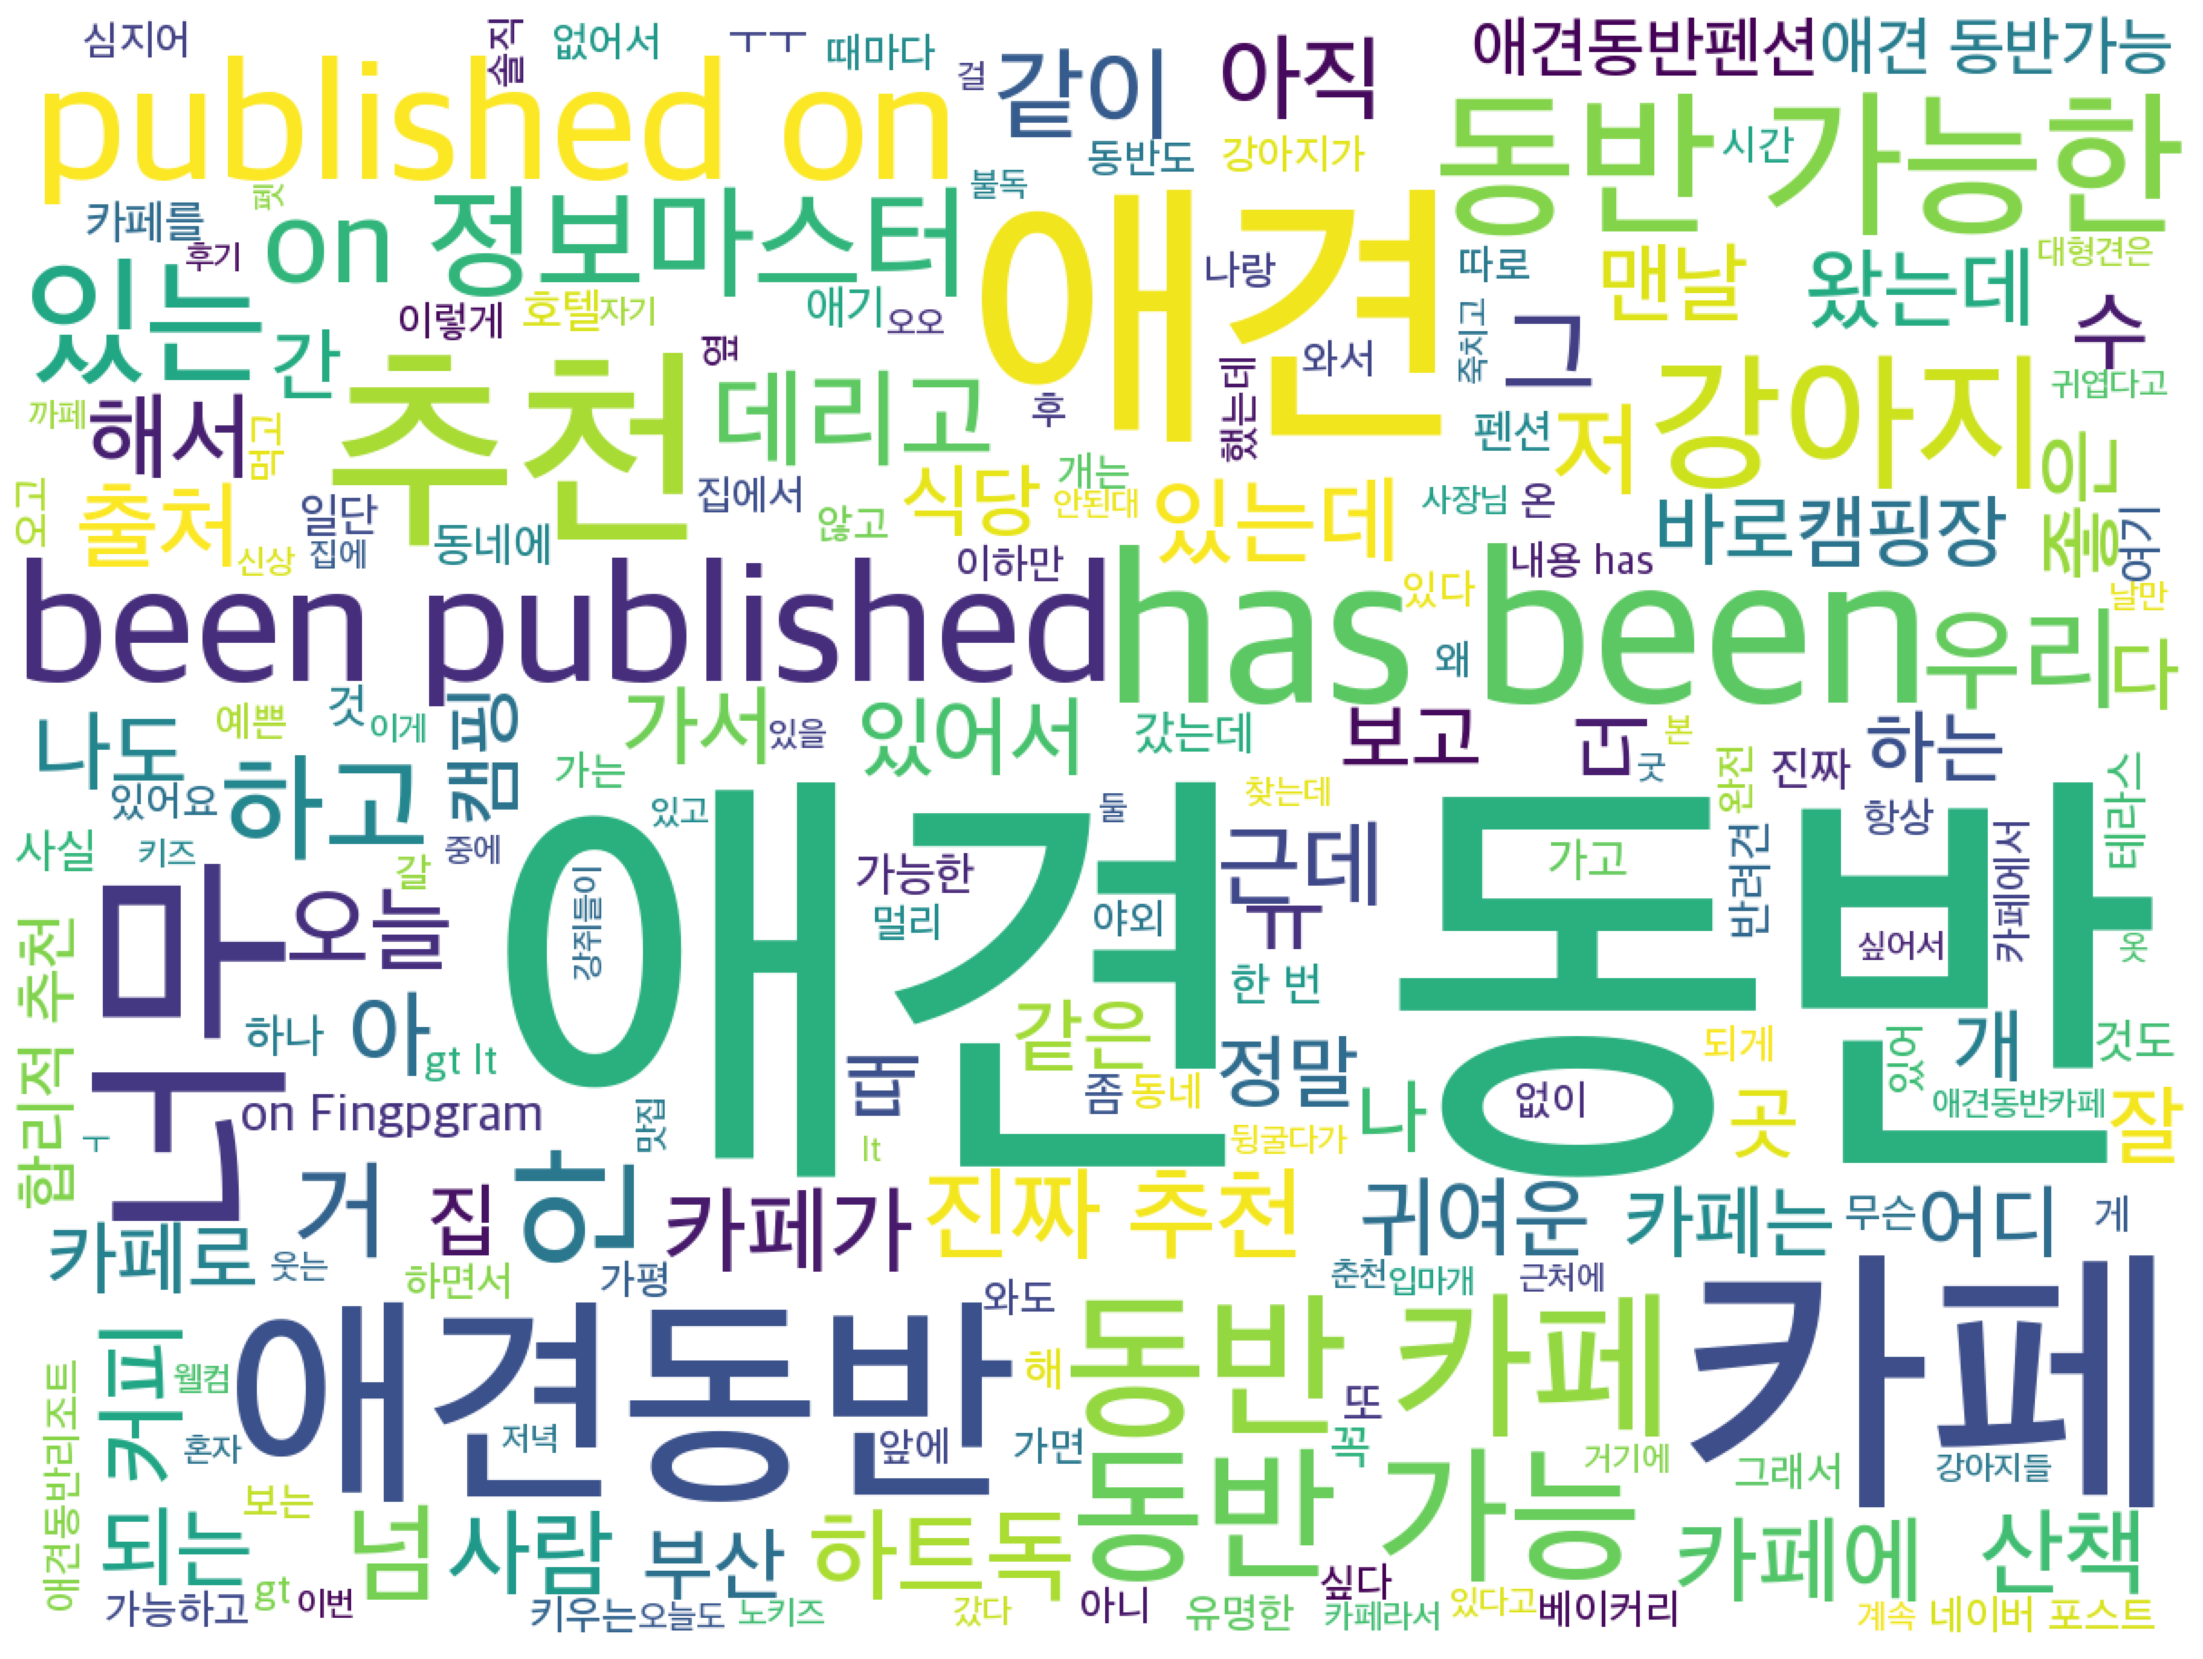

In [41]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))